In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
%matplotlib inline
import nltk
import numpy as np

In [31]:
tweets = pd.read_csv('./processed_dataset/Putin.csv',keep_default_na =False)
tweets.head()

,Unnamed: 0,text,emojis,tokens,nouns,adjectives,affect_list,affect_dict,affect_frequencies,affect_percent,...,fear,anger,anticipation,trust,surprise,sadness,disgust,joy,sentiment_score,sentiment
0,0,RT @TimothyDSnyder: It is senseless to shelter...,[],senseless shelter putin sense losing figure act,senseless shelter putin sense figure act,,[],{},{},"{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,0,-0.3818,Negative
1,1,"@chaplinez70 Murderous Putin, over to you",[],murderous putin,putin,murderous,[],{},{},"{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,0,-0.6369,Negative
2,2,RT @EmbassyofRussia: 🇷🇺President #Putin on US ...,['🇷🇺'],president putin u biolabs ukraine task collect...,president task materials spread viruses,biolabs biological analyze,[],{},{},"{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,0,0.0000,Neutral
3,3,RT @AnonOpsSE: Putin's propagandist Vladimir S...,[],putin propagandist vladimir solovyov never see...,putins solovyov villa shores italy solovyo,vladimir como,[],{},{},"{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,0,0.0000,Neutral
4,4,RT @co_co_no5: @OnlinePalEng I think these Isr...,[],think israelite definitely barbaric putin,israelites putin,barbaric,[],{},{},"{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,0,0.4019,Neutral


In [43]:
emotions = ['fear', 'anger', 'anticipation', 'trust', 'surprise','sadness', 'disgust', 'joy']
class Visulization:
    @staticmethod
    def createSentimentPieChart(tweets,title):
        props = tweets['sentiment'].value_counts(normalize=True)
        #print(props)
        plt.figure()
        plt.pie(props,labels=props.keys(),autopct='%.0f%%',)
        plt.title(title)
        return props

    @staticmethod
    def createEmotionPieChart(tweets,title):
        res = {}
        for emotion in emotions:
            res[emotion] = len(tweets.query(emotion+'==1'));
        print(res)
        plt.figure()
        plt.pie(res.values(),labels=res.keys(),autopct='%.0f%%',)
        plt.title(title)

    @staticmethod
    def createWordCloudForEmotion(tweets,emotion,column,title):
        filtered_tweets = tweets.query(emotion+'==1')

        #tokens = sum(res_map, [])
        # Create a WordCloud object
        wordcloud = WordCloud(mode="RGBA", background_color=None , max_words=1000, height = 400, width = 900, contour_width=3, contour_color='steelblue')
        long_string = Visulization.create_joint_string(filtered_tweets,column)
        # Generate a word cloud
        wordcloud.generate(long_string)
        # Visualize the word cloud
        wordcloud.to_image()
        plt.figure(figsize=(20,15))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(title, fontsize=18, color = 'Orange')
        plt.show()
    @staticmethod
    def create_joint_string(tweets,column):
        res_map = list(map(Visulization.Convert,tweets[column].values))
        long_string = ' '.join(list(map(' '.join,res_map)))
        return long_string
    @staticmethod
    def plot_frequency_chart(info):
        fig, ax = plt.subplots(figsize=(14, 8))
        sns.set_context("notebook", font_scale=1)
        ax = sns.barplot(x=info['x'], y=info['y'], data=info['data'], palette=(info['pal']))
        ax.set_title(label=info['title'], fontweight='bold', size=18)
        plt.ylabel(info['ylab'], fontsize=16)
        plt.xlabel(info['xlab'], fontsize=16)
        plt.xticks(rotation=info['angle'],fontsize=14)
        plt.yticks(fontsize=14)
        plt.tight_layout()
        #plt.savefig('images/' + info['fname'])

        return

    def creatNGramsChart(tweets,emotion,title = 'default title',n=3,topCnt = 10):
        filtered_tweets = tweets.query(emotion+'==1')
        assert (n == 2 or n==3)
        long_string = Visulization.create_joint_string(filtered_tweets,'tokens')
        # Get tokens
        tokens = long_string.split(' ')
        if n == 3:
            trigrams = nltk.trigrams(tokens)
        elif n == 2:
            trigrams = nltk.trigrams(tokens)
        df_trigrams = Visulization.get_top_n_grams(trigrams,n,topCnt)
        info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
                'xlab': 'Trigrams', 'ylab': 'Count', 'pal':'viridis',
                'title': title,
                'angle': 40}
        Visulization.plot_frequency_chart(info)

    @staticmethod
    def get_top_n_grams(trigrams, N=3, top_grams = 10):
        grams_str = []
        data = []
        gram_counter = Counter(trigrams)

        for grams in gram_counter.most_common(top_grams):
            gram = ''
            grams_str = grams[0]
            grams_str_count = []
            for n in range(0,N):
                gram = gram + grams_str[n] + ' '
            grams_str_count.append(gram)
            grams_str_count.append(grams[1])
            data.append(grams_str_count)
            print(grams_str_count)

        df = pd.DataFrame(data, columns = ['Grams', 'Count'])

        return df
    @staticmethod
    def Convert(string):
        # li = list(string.strip('][').split(", "))
        # res = [x.strip('\'\'') for x in li]
        # if string.isnull()    :
        #     return []
        res = list(string.split(" "))
        return res

#Visulization.createSentimentPieChart(tweets,'Sentiment Sample Title')
#Visulization.createEmotionPieChart(tweets,'Emotion Sample Title')
#Visulization.createWordCloudForEmotion(tweets,'fear','nouns','fear word cloud')
#Visulization.createWordCloudForEmotion(tweets,'trust','nouns','trust word cloud')
#Visulization.createWordCloudForEmotion(tweets,'fear','adjectives','fear adjective word cloud')

['breaking news smell ', 7]
['news smell like ', 7]
['6 part 2 ', 7]
['smell like jan ', 4]
['like jan 6 ', 4]
['jan 6 part ', 4]
['followbackfriday happy follow ', 3]
['smell like january ', 3]
['like january 6 ', 3]
['january 6 part ', 3]
['breaking news ', 7]
['news smell ', 7]
['6 part ', 7]
['smell like ', 4]
['like jan ', 4]
['jan 6 ', 4]
['followbackfriday happy ', 3]
['smell like ', 3]
['like january ', 3]
['january 6 ', 3]
{'fear': 17, 'anger': 39, 'anticipation': 77, 'trust': 48, 'surprise': 97, 'sadness': 31, 'disgust': 12, 'joy': 197}


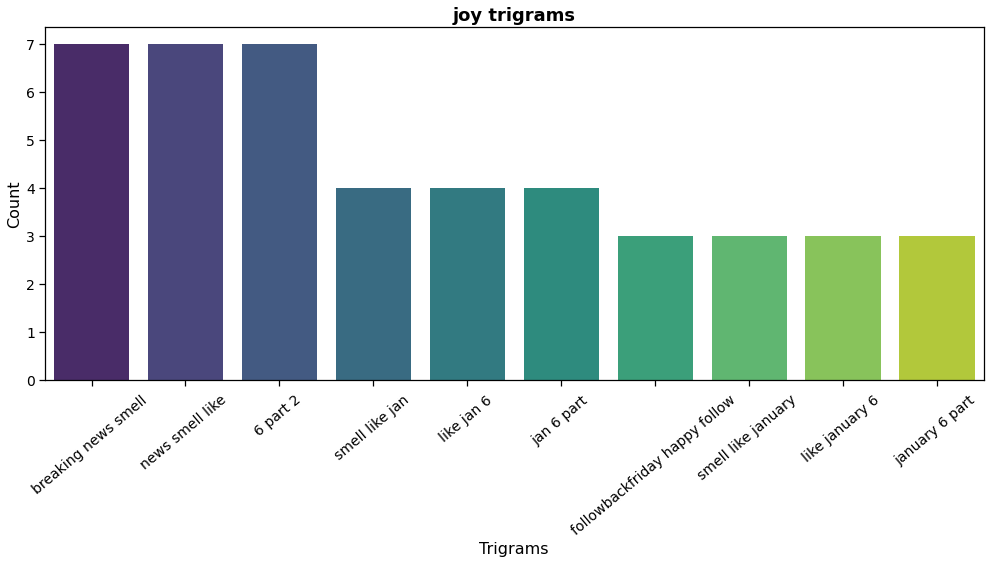

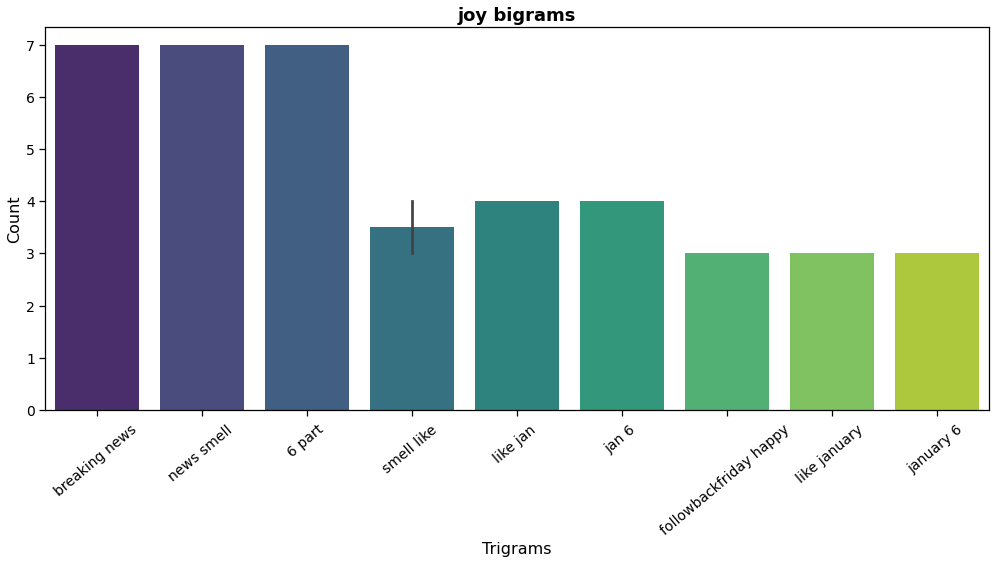

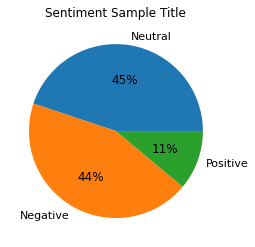

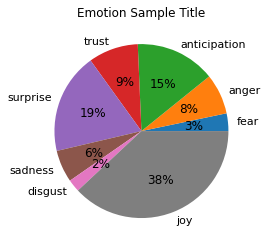

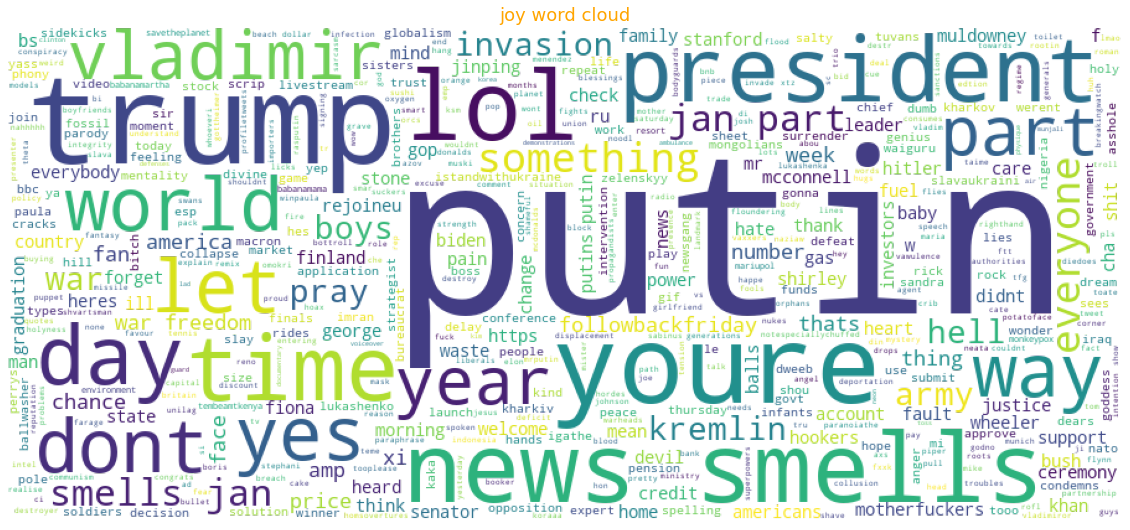

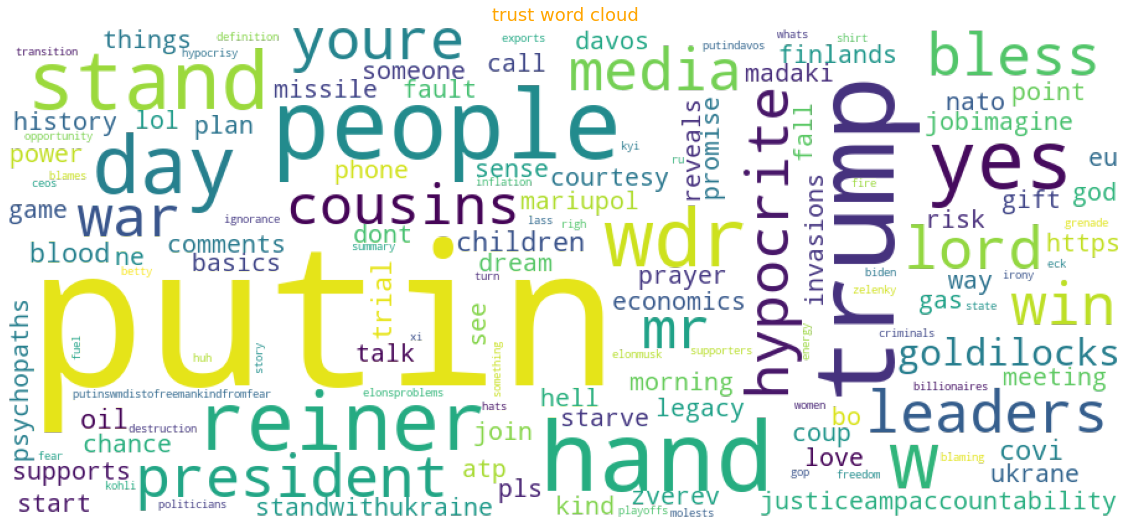

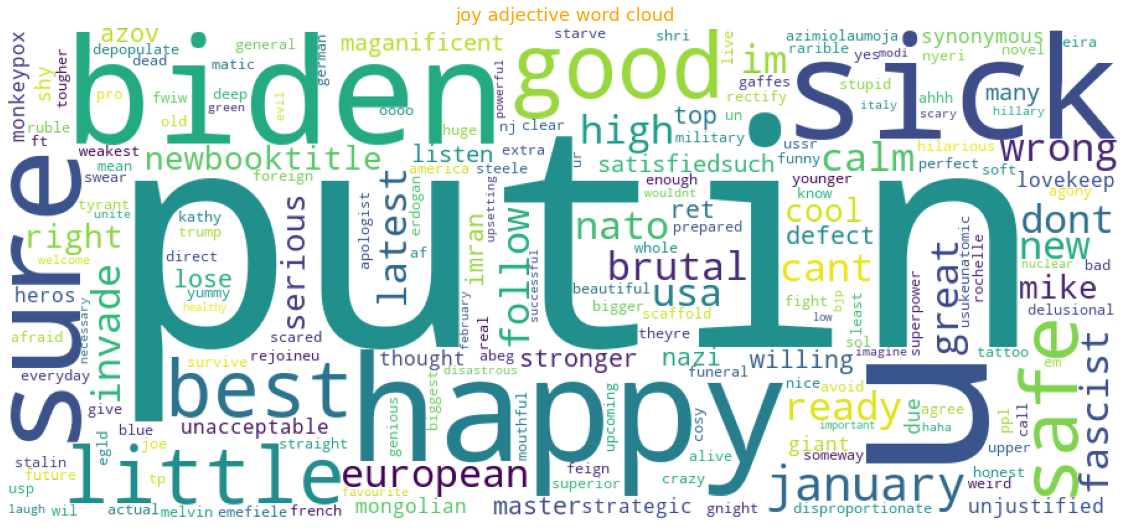

In [44]:
Visulization.creatNGramsChart(tweets,'joy','joy trigrams',3)
Visulization.creatNGramsChart(tweets,'joy','joy bigrams',2)
Visulization.createSentimentPieChart(tweets,'Sentiment Sample Title')
Visulization.createEmotionPieChart(tweets,'Emotion Sample Title')
Visulization.createWordCloudForEmotion(tweets,'joy','nouns','joy word cloud')
Visulization.createWordCloudForEmotion(tweets,'trust','nouns','trust word cloud')
Visulization.createWordCloudForEmotion(tweets,'joy','adjectives','joy adjective word cloud')

# res =tweets[0:10]
# res_map = list(map(Visulization.Convert,res['nouns'].values))
# res_join = ' '.join(list(map(' '.join,res_map)))
# print(res_join)
# print(res_map)
# long_string = ' '.join(list(res['nouns'].values))
# print(long_string)
# initial_list = res['nouns'].values[0]
# print(initial_list)
# res = Visulization.Convert(initial_list)
# print(res)
# print(res[0])

In [47]:
res =tweets.query('joy==1')
res

,Unnamed: 0,text,emojis,tokens,nouns,adjectives,affect_list,affect_dict,affect_frequencies,affect_percent,...,fear,anger,anticipation,trust,surprise,sadness,disgust,joy,sentiment_score,sentiment
17,20,Stronger together 💪🇸🇪🇫🇮🇪🇺\n\n(Putin remains a ...,"['💪', '🇸🇪', '🇫🇮', '🇪🇺', '☝️', '\U0001f978']",stronger together putin remains master strategist,putin strategist,stronger master,"['anger', 'anticipation', 'trust', 'surprise',...",{},"{'anger': 0.03, 'anticipation': 0.31, 'trust':...","{'fear': 0.0, 'anger': 0.026086956521739132, '...",...,0,0,0,0,0,0,0,1,0.3818,Neutral
52,77,"""This isn't going like I thought it would.""\n-...","['😜', '🤣']",isnt going like thought would vladimir putin i...,istandwithukraine,putin,"['fear', 'anticipation', 'trust', 'surprise', ...",{},"{'fear': 0.06, 'anticipation': 0.42, 'trust': ...","{'fear': 0.039735099337748346, 'anger': 0.0, '...",...,0,0,0,0,0,0,0,1,-0.2755,Negative
255,505,RT @GaiaSancini: Russia openly stand with Imra...,"['🇵🇰', '💚', '🇷🇺']",russia openly stand imran khan putin,khan putin,imran,"['anticipation', 'trust', 'surprise', 'sadness...",{},"{'anticipation': 0.11, 'trust': 0.33, 'surpris...","{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,1,0.0000,Neutral
278,546,@jadeitewarrior Because Putin instructed Trump...,"['😄', '🤣']",putin instructed trump,putin trump,,"['anticipation', 'trust', 'surprise', 'joy']",{},"{'anticipation': 0.36, 'trust': 0.28, 'surpris...","{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,1,0.0000,Neutral
359,752,#Putin welcome to hell!! #SlavaUkraini 🇺🇦💪🇺🇦💪🇺...,"['🇺🇦', '💪', '🇺🇦', '💪', '🇺🇦', '💪', '🇺🇦', '💪', '...",putin welcome hell slavaukraini,putin welcome hell slavaukraini,,"['anger', 'anticipation', 'trust', 'surprise',...",{},"{'anger': 0.15, 'anticipation': 1.55, 'trust':...","{'fear': 0.0, 'anger': 0.02608695652173913, 'a...",...,0,0,0,0,0,0,0,1,-0.3818,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,37183,RT @Mphow_N: 😭😂😂Putin doesn't want to take cha...,"['😭', '😂', '😂']",putin doesnt want take chance,putin chances,,"['fear', 'anger', 'anticipation', 'trust', 'su...",{},"{'fear': 0.45, 'anger': 0.22, 'anticipation': ...","{'fear': 0.0788091068301226, 'anger': 0.038528...",...,0,0,0,0,0,0,0,1,-0.2411,Negative
15791,37212,RT @allama_haque: Latest news putin is also a ...,"['😂', '😂', '😂']",latest news putin also munjali fan munjali,news putin fan munjali,latest,"['fear', 'anticipation', 'trust', 'surprise', ...",{},"{'fear': 0.18, 'anticipation': 0.51, 'trust': ...","{'fear': 0.033707865168539325, 'anger': 0.0, '...",...,0,0,0,0,0,0,0,1,0.3182,Neutral
15995,37674,RT @ManciniornellaM: @friendofrussia 💞❤️We LOV...,"['💞', '❤️', '❤️', '💞', '💞', '💞', '❤️', '🇷🇺', '...",love president putin,president putin,,"['anticipation', 'trust', 'surprise', 'joy', '...",{},"{'anticipation': 1.5, 'trust': 3.6599999999999...","{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,1,0.6369,Positive
16146,38083,RT @NodsFor: Love putin lad 🙌🙌🙌🙌,"['🙌', '🙌', '🙌', '🙌']",love putin lad,putin lad,,"['anticipation', 'trust', 'surprise', 'joy', '...",{},"{'anticipation': 1.32, 'trust': 1.88, 'surpris...","{'fear': 0.0, 'anger': 0.0, 'anticipation': 0....",...,0,0,0,0,0,0,0,1,0.6369,Positive
